In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
import matplotlib



In [2]:
tm = pd.read_csv("E:\\archive (6).zip")

In [3]:
tm.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
tm.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
tm.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_19776\3456944879.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tm.corr()


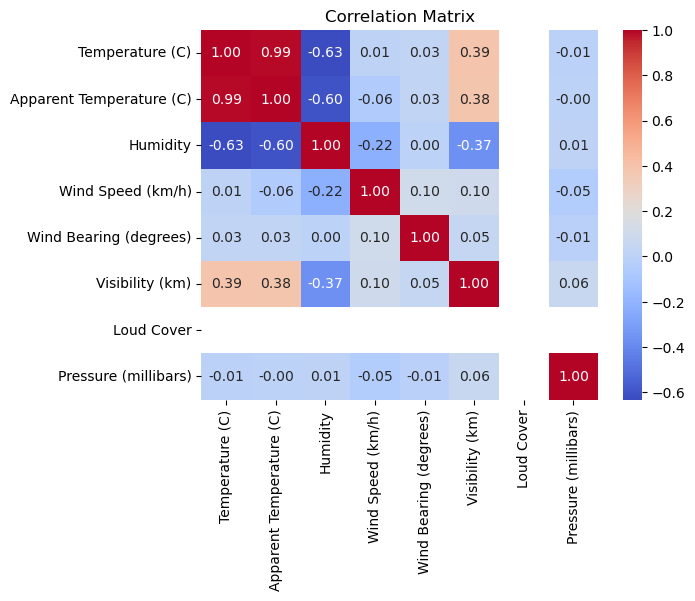

In [6]:
correlation_matrix = tm.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
tm.drop( 'Loud Cover', axis = 1 , inplace = True )

In [8]:
tm['Formatted Date'] = pd.to_datetime(tm['Formatted Date'],utc=True)

In [9]:
tm['Formatted Date'].sample(10)

90252   2016-02-23 14:00:00+00:00
49112   2011-03-16 07:00:00+00:00
58910   2012-05-26 13:00:00+00:00
84617   2015-03-04 20:00:00+00:00
50683   2011-11-19 19:00:00+00:00
86430   2015-10-18 08:00:00+00:00
45258   2011-08-07 16:00:00+00:00
85105   2015-05-23 03:00:00+00:00
69427   2013-10-09 17:00:00+00:00
80708   2015-12-21 22:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [10]:
tm['year'] = tm['Formatted Date'].dt.year
tm['month'] = tm['Formatted Date'].dt.month
tm['day'] = tm['Formatted Date'].dt.day
tm['weekday'] = tm['Formatted Date'].dt.weekday

In [11]:
tm.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956,2011.00029,6.523001,15.727100,2.999347
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906,3.16216,3.448501,8.802216,2.000282
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,2005.00000,1.000000,1.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000,2008.00000,4.000000,8.000000,1.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,2011.00000,7.000000,16.000000,3.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,2014.00000,10.000000,23.000000,5.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,2016.00000,12.000000,31.000000,6.000000


In [12]:
tm['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [13]:
tm.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day,weekday
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,3,31,4
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,3,31,4
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4,1,5
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4,1,5
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4,1,5


In [14]:
precip_types = {'rain':0,'snow':1}
tm['precip_type']= tm['Precip Type'].map(precip_types)
tm.precip_type = tm.precip_type.fillna(0)

In [15]:
lbl_encoder=preprocessing.LabelEncoder()
tm['summary'] = lbl_encoder.fit_transform(tm['Summary'])
tm['Daily Summary'] = lbl_encoder.fit_transform(tm['Daily Summary'])
tm['summary'].unique()

array([19, 17, 18, 12,  3,  6,  5,  4, 13, 15, 23, 25,  2, 26,  0, 11, 24,
        7,  9, 21, 14, 16,  8, 22, 10,  1, 20])

In [16]:
del tm['Summary']
del tm['Formatted Date']
del tm['Precip Type']

In [17]:
tm.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day,weekday,precip_type,summary
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197,2006,3,31,4,0.0,19
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197,2006,3,31,4,0.0,19
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197,2006,4,1,5,0.0,17
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197,2006,4,1,5,0.0,19
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197,2006,4,1,5,0.0,17


Show Outliers

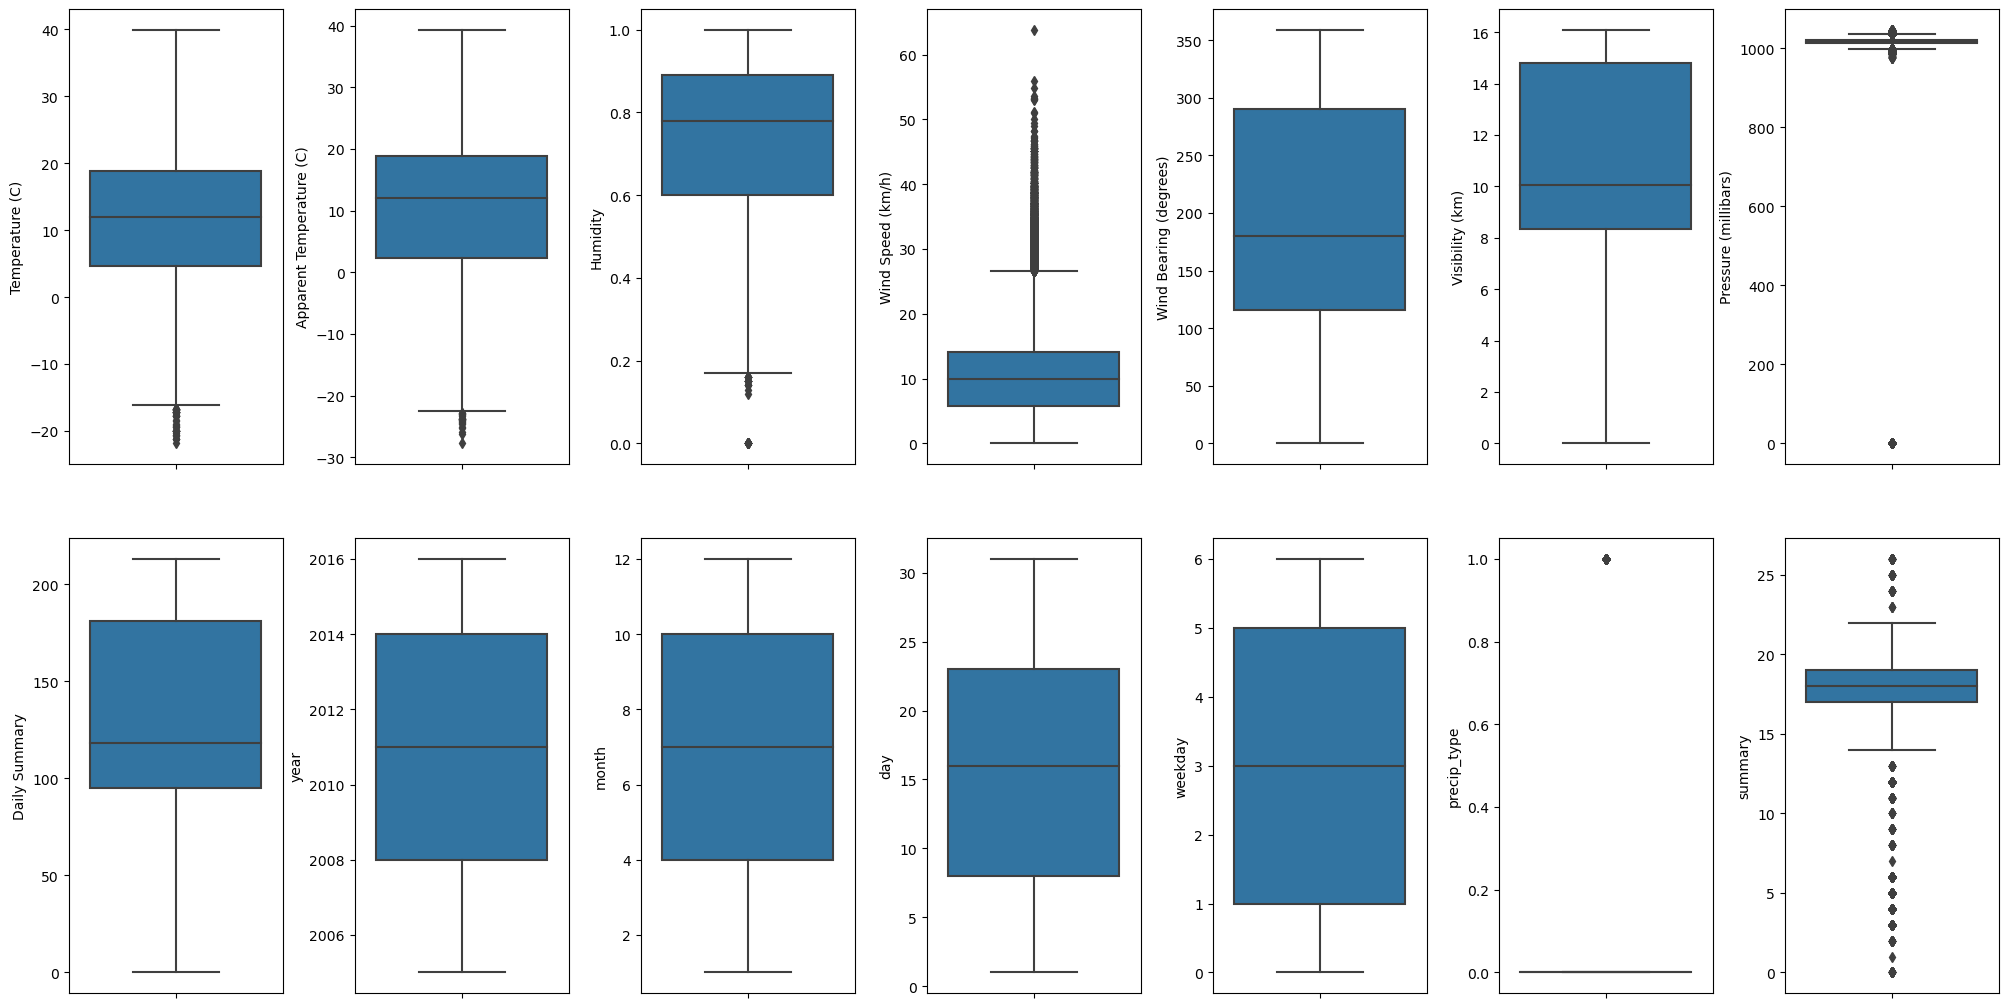

In [18]:
fig , axs = plt.subplots(ncols=7,nrows=2, figsize=(20,10))
index=0
axs= axs.flatten()
for k ,v in tm.items():
    sns.boxplot(y=k, data=tm , ax=axs[index])
    index +=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

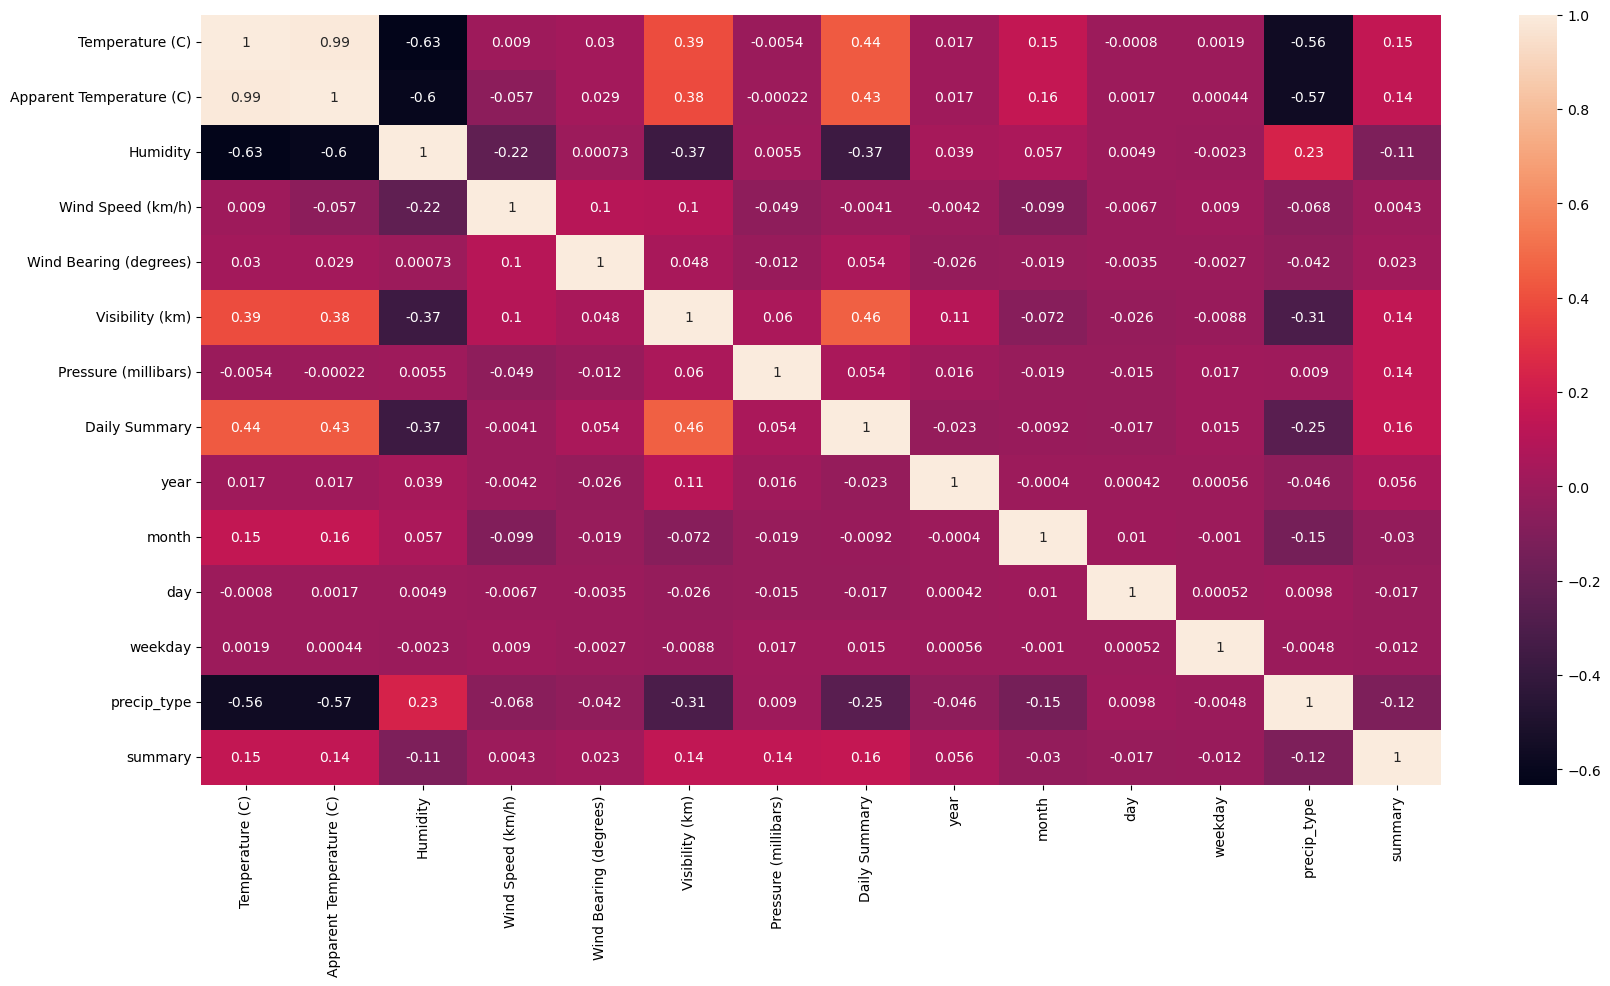

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(tm.corr(),annot=True);

In [20]:
x = tm.drop('Temperature (C)',axis=1)
y = tm['Temperature (C)']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)


In [22]:
model_1 = LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = model_1.predict(x_test)

r2 = r2_score(y_test,y_pred)
print("R2 Linear Regression Score :{:1%}".format(r2))

R2 Linear Regression Score :99.028614%


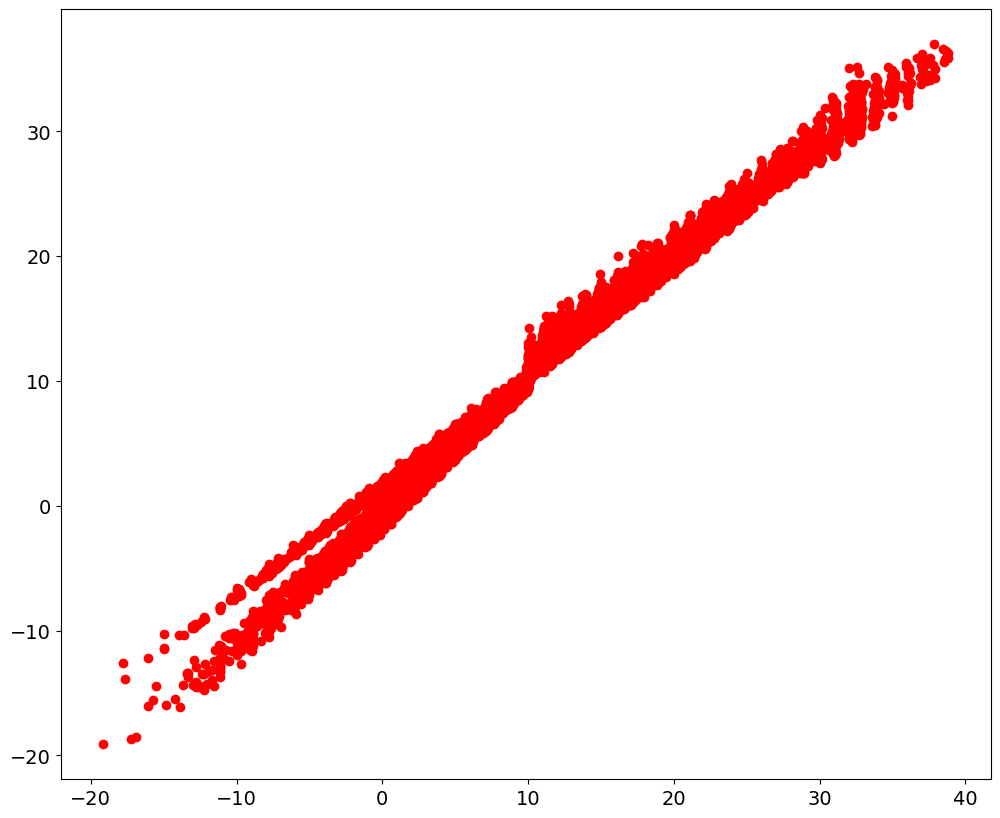

In [24]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 10)
plt.scatter(y_test,y_pred,c='r');